# One-Sample t-Test Hypothesis Testing

## Learning Objectives

After this lecture, students will be able to:

1. describe what hypothesis testing is

2. discuss the use of one-sample t-test hypothesis testing

3. describe procedure performing one-sample t-test hypothesis testing

4. perform one-sample t-test hypothesis testing using python

In [1]:
######################################################################################################################
############################################ Preamble ################################################################
######################################################################################################################
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import HTML

##########################################
######### Code folding script ############
##########################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

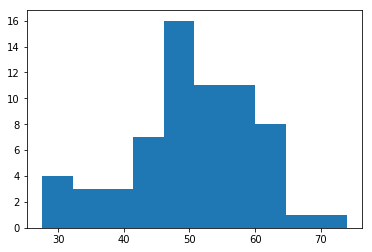

Sample mean = 50.53 
Sample variance = 88.39 
Sample size = 65


In [2]:
######################################################################################################################
############################################ Simulate a sample #######################################################
######################################################################################################################
pop_mean = 50. # population mean
pop_std = 10. # population standard deviation
sample_size = 65 # sample size
seed = 1234 # random seed
np.random.seed(seed) # set seed
sample = np.random.normal(pop_mean,pop_std,sample_size) # simulate

###########################################
############ Histogram of the sample ######
###########################################
plt.figure()
plt.hist(sample)
plt.show()

###########################################
############ Sample statistics ############
###########################################
sample_mean = sample.mean()
sample_var = sample.var(ddof=1)
print('Sample mean = {0:.2f} \nSample variance = {1:.2f} \nSample size = {2}'.format(sample_mean,sample_var,sample_size))

######################################################################################################################
############################################ Hypothesis testing ######################################################
######################################################################################################################
test_mean = 60. # target value
alpha = 0.05 # significance level
tscore = stats.ttest_1samp(sample,test_mean) # calculate sample t score
tcrit = stats.t.ppf(alpha/2,sample_size-1) # calculate critical t score
confidence_interval = stats.t.interval(1-alpha, sample_size-1 # calculate confidence interval
                                       , loc=sample_mean, scale=np.sqrt(sample_var/sample_size))

######################################################################################################################
############################################ Calculate beta ##########################################################
######################################################################################################################
tscore_beta_left = (confidence_interval[0] - pop_mean)/np.sqrt(sample_var/sample_size)
tscore_beta_right = (confidence_interval[1] - pop_mean)/np.sqrt(sample_var/sample_size)
cdf_beta_left = stats.t.cdf(tscore_beta_left,sample_size-1)
cdf_beta_right = stats.t.cdf(tscore_beta_right,sample_size-1)
beta = cdf_beta_right - cdf_beta_left

## Overview

This lecture focuses on performing one-sample t-test hypothesis testing (t-test for short) using python. We will work with a simulated sample shown in the histogram. From the sample, we would like to verify whether the sample mean is indifference to {{test_mean}}. Following in this lecture, we will verify the statement with three different methods: i) comparing sample t score to critical t score, ii) constructing a confidence interval, and iii) applying p-value. These three methods will lead to the same verification. 

This lecture is organized by first discussing theory and mathematics behind the technique. We will go through each step by performing manual calculation. Afterwards, the python code routine would be discussed.

## Prerequisites

This lecture assumes students being familiar with basic concept of probability, and distribution function, especially, Student's t distribution. Also, students should already understand how to calculate sample mean and variance, interpret the area under the curve of a density function, and understand the two types of error. Basic knowledge of using python is also required if one would like to perform the t-test by following the code routine.

## Hypothesis Testing

A hypothesis testing is performed in order to verify what conclusion should be made regarding to the properties of the data, and at how much likelihood that the conclusion might be wrong. For example, we might want to verify if we can conclude that the sample mean is statistically indifference to a certain value, or to other samples.

There are various types of hypothesis testing. Each type has its own strength, weakness, and assumptions that must be satisfied. In a broad sense, we can classify hypothesis testing methods into parametric and nonparametric. The difference between the two is that nonparametric method does not assume distribution properties of a sample, while parametric method does. In this lecture, we will focus on the one-sample t-test.

## Assumptions

In one-sample t-test, we require the following assumptions to be satisfied in order that the method will provide a valid result:
1. the random variables (i.e., $x_1,...,x_N$) being continuous from negative to positive infinity, 
2. independently and identically distributed (i.i.d.) of the random variables which simply means each data point is drawn from the same distribution independently of other data points,
3. normal distribution of sample means, and
4. unknown population variance and applying sample variance in the estimation instead.

Note that, we might often see the use of t-test with random variables that are not extended to infinity, such as test scores. The test is still approximate acceptable if the variables are well distributed within the defined range, such as the density around the boundary is significantly low. If this is the case, one method we can apply is to transform the variables to a well defined range before performing the test. However, we will not cover this complication in this lecture.

## Is the Sample Mean Indifference to {{test_mean}}?

Our current question we will work on is to verify when the sample mean is indifference to {{test_mean}}. This kind of question, together with the nature of the data, is suitable to be tested with one-sample t-test, because the test compares one sample with a target value.

we will perform the t-test by using the simulated data presented above, which are randomly drawn i.i.d. from a normal distribution with mean {{pop_mean}} and variance {{pop_std**2}}. Note that we do not need to know the original data, because we require only the sample mean, variance, and size. These values are stated below the histogram.

To perform the test, we follow this recipe of 5 steps.

### 0. Set up hypothesis

The hypothesis of this scenario is as following:

$H_0$: $\bar{x}$ = {{test_mean}}


$H_1$: $\bar{x}$ $\neq$ {{test_mean}}

where $H_0$ is called a null hypothesis, $H_1$ is called an alternative hypothesis, and $\bar{x}$ is the sample mean. To explain why the hypothesis must be like this, i.e., not $H_1$: $\bar{x}$ = {{test_mean}} for example, we will have to go through the philosophy underlying, which we will not discuss here. In practice, the trick is to set an argument with equality as the null hypothesis, and any inequality (also including greater and less than) as the alternative one.

### 1. Calculate sample t score

The sample t score is defined as
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{N}}}
$$
where $\bar{x}$ is the sample mean, $\mu$ is the target value we are comparing to, i.e., $\mu = 60$ in this case, $s$ is the sample standard deviation, and $N$ is the sample size. The greater the sample t score deviating from zero implies the more likely that the null hypothesis will be rejected. Note that the sample t score is affected by both the difference $\bar{x} - \mu$ itself, and the dispersion term at the denominator $\frac{s}{\sqrt{N}}$. The denominator term simply tells us as, if the dispersion of the sample is large, it is unlikely that we can state the difference between $\bar{x}$ and $\mu$, i.e., unlikely to reject the null hypothesis. In our case, the sample t score is {{'{0:.3f}'.format(tscore[0])}}.

### 2. Choose significance level

As mentioned earlier, a hypothesis testing is performed in order to verify what conclusion should be made regarding to the properties of the data, and at how much likelihood that the conclusion might be wrong. The significance level, $\alpha$, represents the likelihood of making a wrong conclusion. To be precise, what we are doing here is to find evidence from the data that we can reject the null hypothesis given the acceptable rate of error $\alpha$. In other words, this is the Type I error occurred when rejecting a null hypothesis that is actually true, or a false positive (since we typically consider the alternative hypothesis as a positive outcome). We note that the test is not involved with Type II, or $\beta$, error that states the error from failing to reject a null hypothesis that is actually false, or false negative. Again, the underlying reason for this comes from the philosophy of the test.

In practice, we simply choose $\alpha$ as how much the rate of error from a false positive would be acceptable. Let's say we choose $\alpha = ${{'{0:.2f}'.format(alpha)}}. It means that, if we reject the null hypothesis, there is {{'{0:.2f}'.format(alpha*100)}}% chance that the null hypothesis is actually correct.

### 3. Calculate the critical t score

The probability density function (PDF) of the t-distribution is defined by $P(x|\nu)$ where $P(\cdot)$ is the t-distribution PDF, $x$ is the random variable, and $\nu = N-1$ is the degrees of freedom. The t-distribution is a symmetric bell-shaped distribution that has bigger wings than the normal distribution. The t-distribution is converged to the normal distribution at the limit $\nu$ to infinity.

For our purpose here, we would like to identify the critical t score $t_{crit}$ corresponding with the significance level, degrees of freedom, and hypothesis. According to the alternative hypothesis that we specify as an inequality sign, this is a 2-tailed hypothesis, i.e., we are interested in both negative and positive sides of the distribution. Since the significance level defines the total acceptable error, in the 2-tailed hypothesis we find the $t_{crit}$ on one side by considering $\alpha/2$. This is also correct due to the symmetry of the t-distribution. Therefore, in our case that $\alpha = ${{'{0:.2f}'.format(alpha)}}, $N = ${{sample_size}}, with 2-tailed hypothesis, we look up in the t-distribution table given $\nu = ${{'{0:.0f}'.format(sample_size - 1)}} for a t score that gives us {{'{0}'.format(alpha/2)}} cumulative probability (i.e., area under the PDF curve from negative infinity to the t score). We get $t_{crit} =${{'{0:.3f}'.format(tcrit)}}.

### 4. Compare the t score and the critical t score, and make a conclusion

Given the 2-tailed hypothesis, the critical t score separates the space of values into two regions: reject the null hypothesis if $|t| > |t_{crit}|$, or fail to reject the null hypothesis otherwise. In our case, we have $|t| > |t_{crit}|. Therefore, we conclude that "we reject the null hypothesis given the significance level {{alpha}}." 

Note that, the conclusion statement must always include the significance level for the claim. Moreover, to be statistically correct, the claim can either be "reject" or "fail to reject" the null hypothesis, which is not the same as saying "accept."

## Alternative Testing: Confidence Interval and p-Value

In the previous testing, we aim to compare between the sample t score and the critical t score. There are other ways that we can reach the same conclusion by considering different statistics. Here, we discuss testing by constructing a confidence interval, and by applying a p-value.

### Confidence interval

A confidence interval (CI) tells us how much likely that a randomly drawn variable would be inside the interval. For example, if we have a 95% CI from [0,10] that is extended from the sample mean 5, it implies that we are 95% certain that a randomly drawn variable would be some value between 0 to 10. Therefore, in term of hypothesis testing, we can say that the sample mean is indifference to 5 with 95% certainty (or 5% error).

The idea of constructing a confidence interval (CI) for a hypothesis testing is that we expand from the sample mean to be a range of values. The size of the range is determined by the significance level, and the sample size and variance. To be precise, for the t-statistics, the size of the range is 
$$
| x - \bar{x} | = |t_{crit}| \frac{s}{\sqrt{N}}
$$
We conclude that "there is no statistical difference between the sample mean and the target value (or fail to reject $H_0$) with (1 - $\alpha$)$\times$100\% confidence level," if the target value is inside the range, and vice versa.

In our case, the {{(1-alpha)*100}}% CI is [{{'{0:.2f}'.format(confidence_interval[0])}},{{'{0:.2f}'.format(confidence_interval[1])}}]. Since the target value {{test_mean}} is not inside the interval, we can conclude that we reject the null hypothesis at the 95% confidence level.

### p-value

The p-value is another test statistics that can be interpreted as how much likely that the null hypothesis is true. This method is actually easier to perform as well as to interpret the result than the previously introduced methods.

To calculate the p-value, we only need the sample t score. Look up for the tail cumulative probability given the sample t score, i.e., P(|sample t score| $\leq$ t $< \infty$) $\approx$ {{'{0:.3E}'.format(tscore[1]/2)}} in our case. Since our hypothesis is 2-tailed, we sum the tail probability from both sides, which is equivalent to multiplying by a factor of 2 to one tail because of symmetry. This is our p-value = {{'{0:.3E}'.format(tscore[1])}}, which means there is {{'{0:.3E}'.format(tscore[1])}} chance that the null hypothesis would be true.

Then, we choose the significance level $\alpha$, which is {{alpha}} in this example. Since the significance level is the maximum acceptable error rate we allow, if p-value $< \alpha$, we reject null hypothesis at the chosen significance level. In our case {{'{0:.3E}'.format(tscore[1])}} $<$ {{alpha}}, so we reject the null hypothesis at {{alpha}} significance level.

## Python Routines

The python routines to perform the t-test are shown in the code cell above. We perform the calculate by using routines provided in scipy.stats (Note: we use the statement "from scipy import stats" in the preamble), which are briefly summarized here.

- Calculate sample t score: stats.ttest_1samp(sample,test_mean), this is the routine that directly performs one-sample t-test. The first argument is an array of sample data, and the second argument is the target value. This routine is very handy because it returns both sample t score and p-value. Therefore, we can directly use the p-value to make a conclusion statement.

- Calculate critical t score: stats.t.ppf(alpha/2,sample_size-1), this routine performs the inverse of the cumulative t-distribution function, i.e., given the left tail probability (the first argument), and degrees of freedom (the second argument), the routine returns the t score corresponding to the input arguments. Note that, the tail probability is alpha/2 because we set a 2-tailed hypothesis.

- Calculate a confidence interval: stats.t.interval(1-alpha, sample_size-1, loc=sample_mean, scale=np.sqrt(sample_var/sample_size)), the input arguments are the confidence level 1-alpha, degrees of freedom, the sample mean (which is the center of the expansion), and the dispersion term as the denominator in the t score formula. This routine returns the both lower and upper limits of the 1-$\alpha$ CI.

## Summary and Notes

In this lecture, we learn how to statistically make a decision and estimate the probability of being wrong regarding to the available data by applying statistical hypothesis testing. The one-sample t-test is introduced as the method appropriate to deal with a problem comparing the properties of one sample to a target value. Assumptions are discussed, and emphasized that they must be approximately satisfied for the method to be valid. We then perform the t-test by following the recipe: setting up hypothesis, calculating sample t score, choosing significance level, calculating critical t score, and comparing the t scores for the conclusion. Moreover, we learn how to construct a confidence interval and calculate p-value, which both of them can also be used to make a conclusion and are consistent with the first method comparing t scores. Again, it is emphasized that the conclusion statement is to say either "reject" or "fail to reject" the null hypothesis with the chosen significance level. Last, we discuss the python routines to perform this test.

A couple of points are worth noting. First, we set up a 2-tailed hypothesis in our example. For a 1-tailed hypothesis, we still follow the same recipe, but the test statistics, i.e., the critical t value, CI, and p-value will be slightly change in the formula and when to interpret rejecting the null hypothesis. Second, this recipe and the idea behind it is quite generalized that can be applied to other types of hypothesis testing. Precisely, in order to perform a hypothesis testing, we first need to have a dataset that at least approximately satisfies the underlying assumptions of the test we are using. Then, we try to calculate a statistic score representing the dataset, then compare it the a test score representing the acceptable error rate. Therefore, students should have this hypothesis testing framework in mind, so that they can extend to understand other types of the test easily. 

Last, the meaning of Type I $\alpha$ and Type II $\beta$ errors can be interpreted in the terms of precision/recall. By definition of the error types, we can construct the contingency table as P(prediction | outcome):

- P(reject null | null false) = 1 - $\beta$, P(reject null | null true) = $\alpha$
- P(not reject null | null false) = $\beta$, P(not reject null | null true) = 1 - $\alpha$

Therefore, by treating null as a negative case, we can associate the errors with precision/recall as:

- Precision (or positive predictive value) = true positive / positive prediction = $\frac{1 - \beta}{1 - \beta + \alpha}$
- Recall (or sensitivity) = true positive / positive outcome = $\frac{1 - \beta}{1 - \beta + \beta}$ = 1 - $\beta$

Note that, the test aims to reject the null hypothesis, therefore Type I error $\alpha$ is associated with it, and this has nothing to do with Type II error $\beta$. 

## Additional Materials: Calculate $\beta$

We discuss how to calculate Type II $\beta$ error here. To calculate $\beta$, the population mean is required, which in practice we actually do not have this information. However, let's say we assume the population mean {{pop_mean}}. Then, given our null hypothesis, $\beta =$ P(not reject $\mu = 60$ | null false, i.e., $\mu \neq 60$) = P(not reject $\mu = 60$ | $\mu =$ {{pop_mean}}). Note that, we substitute the condition with the assumed population mean which is valid because {{pop_mean}} makes the null false. 

From the previous calculation, we set the rejection regions to be |t| $\geq$ {{'{0:.3f}'.format(np.absolute(tcrit))}}. Since it is easier to work on the data unit instead of t score when it comes to calculating $\beta$, we invert the critical t scores on both sides to values in the data unit as: $x = \bar{x} + \frac{s}{\sqrt{N}}t$, which is actually equiavlent to the calculated CI. Therefore, the rejection regions in the data unit is when $x <${{'{0:.2f}'.format(confidence_interval[0])}} or $x >${{'{0:.2f}'.format(confidence_interval[1])}}.

Now, we can re-express the error $\beta =$ P(not reject $\mu = 60$ | $\mu =$ {{pop_mean}}) = P({{'{0:.2f}'.format(confidence_interval[0])}} $\leq$ x $\leq$ {{'{0:.2f}'.format(confidence_interval[1])}} | $\mu =$ {{pop_mean}}). Then, we calculate this probability as if it is a t-distribution centered at {{pop_mean}} with scaled dispersion $s / \sqrt{N}$. We get P({{'{0:.2f}'.format(confidence_interval[0])}} $\leq$ x $\leq$ {{'{0:.2f}'.format(confidence_interval[1])}} | $\mu =$ {{pop_mean}}) = P({{'{0:.3f}'.format(tscore_beta_left)}} $\leq$ t $\leq$ {{'{0:.3f}'.format(tscore_beta_right)}}) = {{'{0:.2f}'.format(beta)}}, implying that the error rate from failing to reject null when null false is {{'{0:.2f}'.format(beta*100)}}%.